# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
dice = []
for i in range(0,10):
    n = random.randint(1,6)
    dice.append(n)
print(dice)

dice = pd.DataFrame(dice, columns=["result"])
dice

[2, 2, 1, 6, 2, 1, 6, 4, 6, 2]


,result
0,2
1,2
2,1
3,6
4,2
5,1
6,6
7,4
8,6
9,2


#### 2.- Plot the results sorted by value.

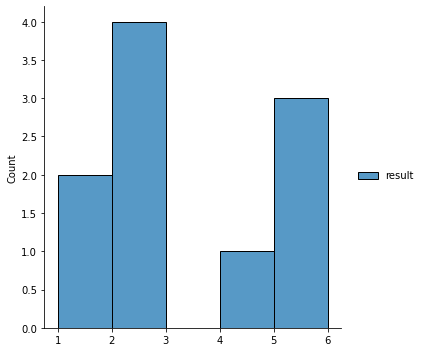

In [3]:
# your code here
sns.displot(dice, kde=False)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015FF7162C70>]],
      dtype=object)

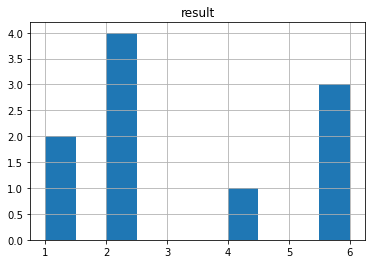

In [4]:
# your code here
dice.hist()

In [5]:
"""
your comments here
"""
# The displot groups the values, so when the result of rolling the dice is between 5 and 6 they are represented by the same bad, and on the other hand the 
# historiogram creates a bar for each result, so 5 has a bar and so does 6.

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here
def mean1_calc(x):
    sum_results = 0
    for i in x:
        sum_results += i
    print(sum_results/len(x))
            
mean1_calc(dice['result'].tolist())

3.2


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
print("Frequency distribution:")
def freq_calc(lst):
    d = {}
    for i in lst:
        if d.get(i):
            d[i] += 1
        else:
            d[i] = 1
    return d
print(freq_calc(sorted(dice['result'].tolist())))

frequency = freq_calc(sorted(dice['result'].tolist()))

print("Mean:")

def mean_calc(dic):
    multiplied = []
    for k, v in dic.items():
        multiplied.append(k*v)
    return sum(multiplied)/len(multiplied)
            
mean_calc(frequency)


Frequency distribution:
{1: 2, 2: 4, 4: 1, 6: 3}
Mean:


8.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
# your code here
dice_list = sorted(dice['result'].tolist())
print("Median is: ") 
def median_calc(lst):
    if len(lst) % 2 == 0:
        median1 = lst[len(lst)//2] 
        median2 = lst[len(lst)//2 - 1] 
        median = (median1 + median2)/2
    else: 
        median = lst[len(lst)//2]
    return median
median_calc(dice_list)

Median is: 


2.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [9]:
# your code here

print("Data Set:",dice_list)
print("Data length:", len(dice_list))

print("Median:",median_calc(dice_list))

def quartiles(lst):
    length = len(lst)
    median = median_calc(lst)
    bigger_half = []
    smaller_half = []
    q1 = []
    q2 = []
    q3 = []
    q4 = []
    for i in lst:

        if i > median:
            bigger_half.append(i)            

        else:
            smaller_half.append(i)
    upper_half = median_calc(bigger_half)

    bottom_half = median_calc(smaller_half)

    for i in bigger_half:
        if i >= upper_half:
            q4.append(i)
        else:
            q3.append(i)
    for i in smaller_half:
        if i >= bottom_half:
            q2.append(i)
        else:
            q1.append(i)    
    print("Q1:", q1)
    print("Q2:", q2)
    print("Q3:", q3)
    print("Q4:", q4)

quartiles(dice_list)
            
        
# I am not sure if the results are good because q4 and q2 are comprised by all the numbers equal or bigger than each half's mean, while q1 and q3 are only
# comprised by the numbers smaller than each half's mean, but otherwise two quartiles remained empty.

Data Set: [1, 1, 2, 2, 2, 2, 4, 6, 6, 6]
Data length: 10
Median: 2.0
Q1: [1, 1]
Q2: [2, 2, 2, 2]
Q3: [4]
Q4: [6, 6, 6]


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [10]:
# your code here
data = pd.read_csv('../data/roll_the_dice_hundred.csv', index_col=0)

data.sort_values(by=['roll'])
# data.hist()

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6
...,...,...
95,95,4
96,96,6
97,97,1
98,98,3


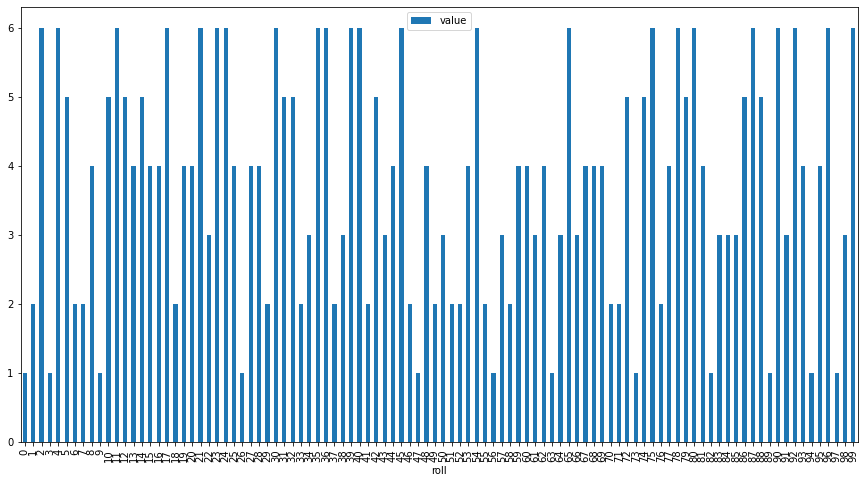

In [11]:
data.set_index("roll").plot.bar(figsize=(15,8));

In [12]:
"""
your comments here
"""

# The results are random, as it's expected with a dice roll. The data has a uniform distribution as all the results are equally likely.

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [13]:
# your code here
results = sorted(data['value'].tolist())

print('Mean: ')
mean = mean1_calc(results)


Mean: 
3.74


#### 3.- Now, calculate the frequency distribution.


In [14]:
# your code here
freq = freq_calc(results)

print('Frequency: ', freq)


Frequency:  {1: 12, 2: 17, 3: 14, 4: 22, 5: 12, 6: 23}


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

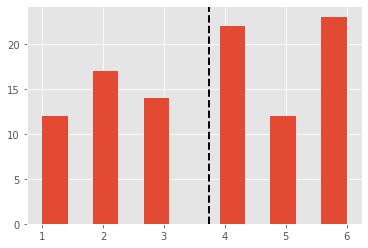

In [15]:
# your code here

x = data['value']

plt.style.use('ggplot')
plt.hist(x, bins=12)
plt.axvline(x.mean(), color="black", linestyle='dashed', linewidth=2)
plt.show()

In [16]:
"""
your comments here
"""

#  displaying the mean shows how it relates to the data. We can see how there are a few more results equal or bigger than 4, explaining why the 
# mean is 3.74

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [18]:
# your code here
roll_the_dice_thousand = pd.read_csv(r"G:\GitHub\Statistics\Descriptive-Stats\data\roll_the_dice_thousand.csv", index_col=0)

roll_the_dice_thousand.head()

,roll,value
0,0,5
1,1,6
2,2,1
3,3,6
4,4,5


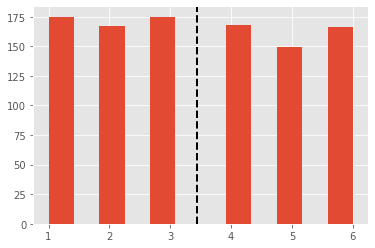

In [19]:
x = roll_the_dice_thousand['value']

plt.style.use('ggplot')
plt.hist(x, bins=12)
plt.axvline(x.mean(), color="black", linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
"""
your comments here
"""
# since we have more data, the distributions tends to be continuous, given the fact that we're rolling a dice and 
# therefore the probability of the outcomes is the same


## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [25]:
# your code here
ages = pd.read_csv(r"G:\GitHub\Statistics\Descriptive-Stats\data\ages_population.csv")

ages.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [28]:
freq_ages = freq_calc(ages['observation'])

print('Frequency: ', freq_ages)

Frequency:  {68.0: 3, 12.0: 11, 45.0: 29, 38.0: 30, 49.0: 19, 27.0: 25, 39.0: 45, 42.0: 32, 33.0: 22, 30.0: 34, 25.0: 19, 44.0: 23, 53.0: 12, 46.0: 23, 50.0: 16, 22.0: 16, 6.0: 2, 29.0: 26, 35.0: 33, 28.0: 20, 26.0: 23, 60.0: 4, 41.0: 36, 52.0: 14, 32.0: 30, 23.0: 17, 15.0: 8, 40.0: 27, 63.0: 7, 31.0: 24, 34.0: 29, 61.0: 2, 64.0: 2, 37.0: 30, 56.0: 15, 14.0: 10, 13.0: 6, 51.0: 9, 36.0: 31, 18.0: 7, 48.0: 19, 58.0: 7, 20.0: 13, 54.0: 13, 19.0: 11, 62.0: 4, 55.0: 13, 21.0: 14, 43.0: 32, 17.0: 10, 7.0: 1, 47.0: 17, 1.0: 2, 16.0: 8, 24.0: 18, 59.0: 8, 57.0: 7, 8.0: 5, 67.0: 4, 2.0: 2, 66.0: 3, 4.0: 1, 73.0: 1, 82.0: 1, 70.0: 1, 5.0: 2, 71.0: 1, 9.0: 2, 69.0: 1, 11.0: 3, 10.0: 3, 65.0: 2}


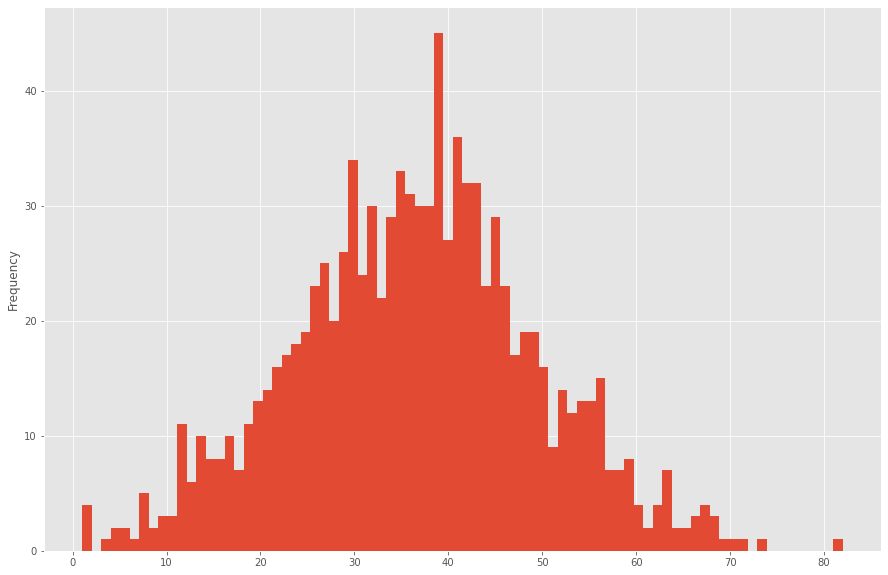

In [32]:
ages["observation"].plot.hist(bins=80, figsize=(15, 10))

In [ ]:
# the mean should be around 40, I don't know about the standard deviation, although most values are between 20 and 50

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [33]:
# your code here
ages.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [ ]:
"""
your comments here
"""

# I did not guess the std, but the mean is more or less close to my guess

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [34]:
# your code here
ages2 = pd.read_csv(r"G:\GitHub\Statistics\Descriptive-Stats\data\ages_population2.csv")

ages2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


In [35]:
freq_ages2 = freq_calc(ages2['observation'])

print('Frequency: ', freq_ages2)

Frequency:  {25.0: 98, 31.0: 61, 29.0: 115, 28.0: 139, 30.0: 90, 24.0: 78, 26.0: 120, 21.0: 17, 27.0: 125, 23.0: 41, 22.0: 35, 32.0: 31, 20.0: 13, 33.0: 22, 19.0: 3, 34.0: 7, 35.0: 3, 36.0: 2}


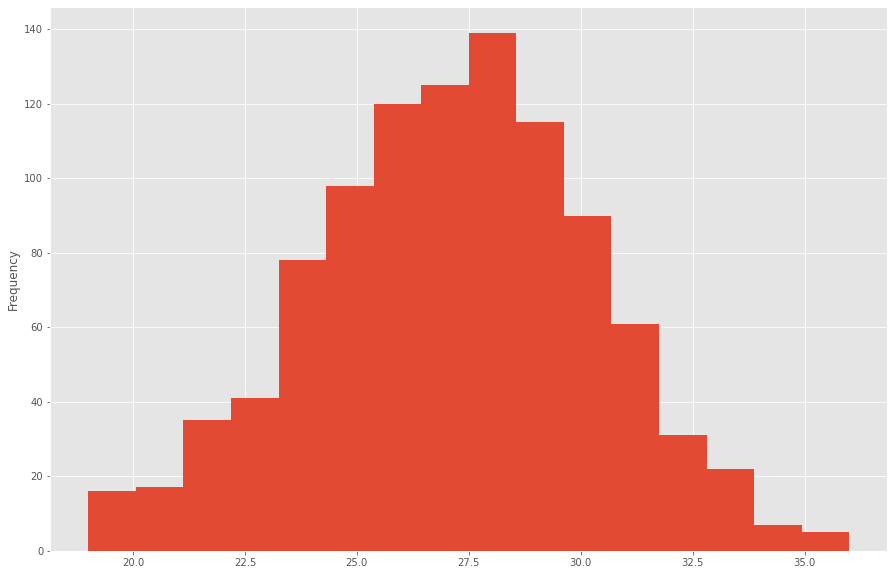

In [39]:
ages2["observation"].plot.hist(bins=16, figsize=(15, 10))

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""
# the ages are a lot closer in value, and there's a high number of values around 27. The maximum value seems to be 35 and the minimum 20. 

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [40]:
# your code here
ages2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [ ]:
"""
your comments here
"""
# the standard deviation is close to 3, which means that the values on thi data set are a lot closer as we could already
# see in the plot. The mean is also lower, which makes sense because the population on this data set is a lot younger.

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [41]:
# your code here
ages3 = pd.read_csv(r"G:\GitHub\Statistics\Descriptive-Stats\data\ages_population3.csv")

ages3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


In [42]:
freq_ages3 = freq_calc(sorted(ages3['observation']))

print('Frequency: ', freq_ages3)

Frequency:  {1.0: 1, 2.0: 2, 4.0: 2, 5.0: 1, 7.0: 1, 8.0: 1, 9.0: 1, 10.0: 2, 11.0: 2, 12.0: 4, 13.0: 2, 14.0: 5, 15.0: 8, 16.0: 9, 17.0: 10, 18.0: 9, 19.0: 12, 20.0: 11, 21.0: 14, 22.0: 11, 23.0: 11, 24.0: 19, 25.0: 17, 26.0: 15, 27.0: 19, 28.0: 18, 29.0: 25, 30.0: 24, 31.0: 21, 32.0: 37, 33.0: 17, 34.0: 20, 35.0: 31, 36.0: 26, 37.0: 31, 38.0: 25, 39.0: 29, 40.0: 21, 41.0: 25, 42.0: 14, 43.0: 22, 44.0: 17, 45.0: 24, 46.0: 22, 47.0: 15, 48.0: 25, 49.0: 18, 50.0: 21, 51.0: 14, 52.0: 17, 53.0: 14, 54.0: 9, 55.0: 13, 56.0: 10, 57.0: 8, 58.0: 6, 59.0: 8, 60.0: 6, 61.0: 6, 62.0: 3, 63.0: 12, 64.0: 12, 65.0: 15, 66.0: 19, 67.0: 22, 68.0: 17, 69.0: 17, 70.0: 19, 71.0: 11, 72.0: 8, 73.0: 6, 74.0: 6, 75.0: 2, 76.0: 1, 77.0: 2}


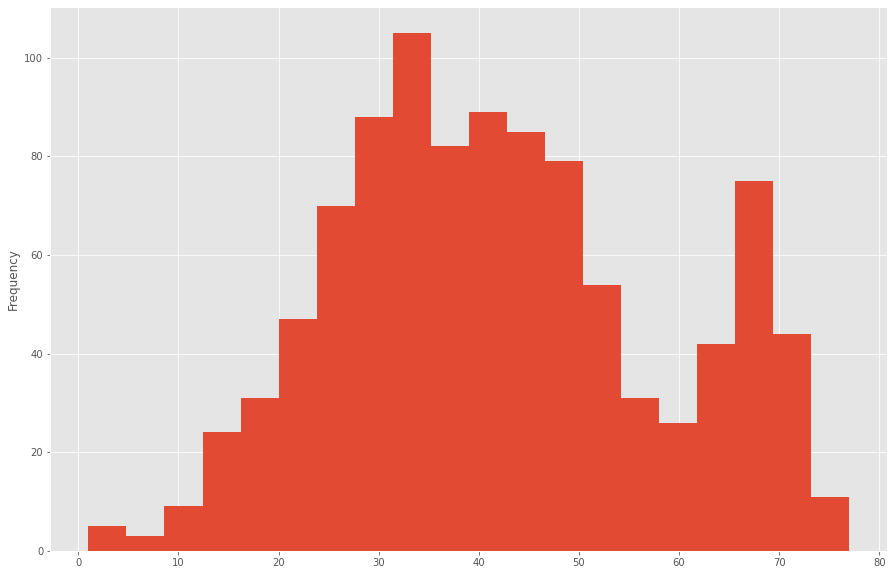

In [44]:
ages3["observation"].plot.hist(bins=20, figsize=(15, 10))

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [45]:
# your code here
ages3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
your comments here
"""
# this data set has a higher concentration of population around 70 years old, which increases the mean to 42. The standard deviation has also increased 
# because of that given that the values are not concentrated around a specific range of ages.

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [47]:
# your code here
ages3.describe().iloc[4:]

,observation
25%,30.0
50%,40.0
75%,53.0
max,77.0


In [ ]:
"""
your comments here
"""
# We can see that the median age is very close to the mean, meaning that the distribution of the data is normal. We can also see that
# there is a higher amount of values on the 3rd quartile, which we could guess by looking at the plot.

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [50]:
# your code here
# np.percentile(a,95)
percentiles = [i * 10 for i in range(1, 11)]
np.percentile(ages3["observation"].tolist(),[i * 10 for i in range(1, 11)])
x = ages3["observation"].tolist()
for i in percentiles:
    print(i,np.percentile(x,i) )

10 22.0
20 28.0
30 32.0
40 36.0
50 40.0
60 45.0
70 50.0
80 57.0
90 67.0
100 77.0


In [ ]:
"""
your comments here
"""
# the gap between the 80,90 and 100 percentiles is wider, which means that there is more ages on this range of ages

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""